In [2]:
import numpy as np 
from matplotlib import pyplot as plt 
from scipy.stats import gamma, norm

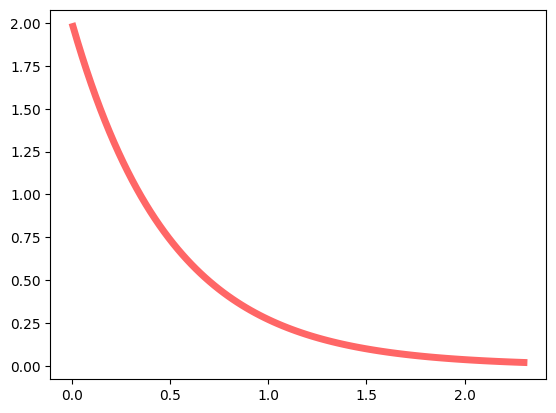

In [3]:
a = 1.
s = .5
x = np.linspace(gamma.ppf(0.01, a, scale=s), gamma.ppf(0.99, a, scale=s), 100)
plt.plot(x, gamma.pdf(x, a, scale=s), 'r-', lw=5, alpha=0.6, label='gamma pdf')

In [4]:
res = np.zeros((250,))
i = 0
active_period = 0
idle_period = 0
for iter in range(100):
    if i + active_period + idle_period < res.shape[0]:
        active_period = int(np.round(gamma.rvs(a = 10, scale = 0.5, size=1)).item() + 1)
        idle_period = int(np.round(gamma.rvs(a=20, scale=0.5, size=1)).item() +1)
        res[i:i+active_period] = 1
        i = i+active_period+idle_period

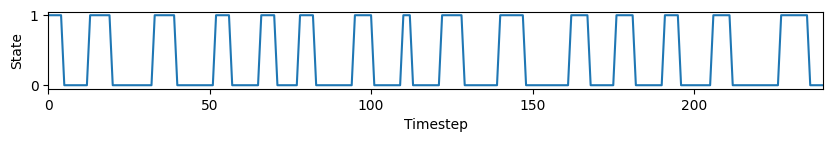

In [5]:
plt.figure(figsize=(10,1))
plt.plot(np.arange(res.shape[0]), res)
plt.xlim((0,240))
plt.xlabel('Timestep')
plt.ylabel('State')
plt.savefig('activity_renewal.pdf', bbox_inches='tight')

In [6]:
res = np.zeros((250,))
i = 0
active_period = 0
idle_period = 0
for iter in range(100):
    if i + active_period + idle_period < res.shape[0]:
        active_period = int(np.round(gamma.rvs(a = 10, scale = 0.5, size=1)).item() + 1)
        idle_period = int(np.round(gamma.rvs(a=20, scale=0.5, size=1)).item() +1)
        res[i:i+active_period] = norm.rvs(loc=0, scale=0.05, size=1).item()
        i = i+active_period+idle_period


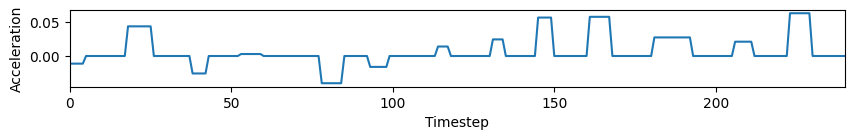

In [7]:
plt.figure(figsize=(10,1))
plt.plot(np.arange(res.shape[0]), res)
plt.xlim((0,240))
plt.xlabel('Timestep')
plt.ylabel('Acceleration')
plt.savefig('accel_impulses.pdf', bbox_inches='tight')

In [8]:
res_set = []
for i in range(200):
    res = np.zeros((500,))
    i = 0
    active_period = 0
    idle_period = 0
    for iter in range(100):
        if i + active_period + idle_period < res.shape[0]:
            active_period = int(np.round(gamma.rvs(a = 30, scale = 0.25, size=1)).item() + 1)
            idle_period = int(np.round(gamma.rvs(a=150, scale=0.25, size=1)).item() +1)
            res[i:i+active_period] = norm.rvs(loc=0, scale=0.5, size=1).item()
            # res[i+active_period:i+active_period+idle_period] = norm.rvs(loc=0, scale=0.05, size=1).item()
            i = i+active_period+idle_period
    res_set.append(res)

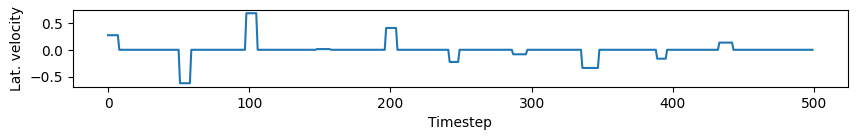

In [9]:
plt.figure(figsize=(10,1))
plt.plot(np.arange(res.shape[0]), res)
plt.xlabel('Timestep')
plt.ylabel('Lat. velocity')
plt.savefig('slipping_impulses.pdf', bbox_inches='tight')

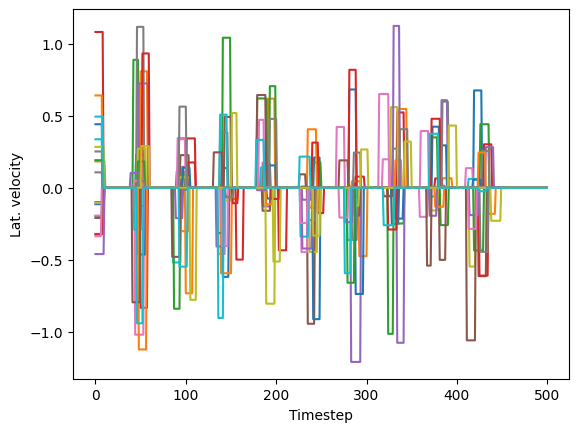

In [13]:
for i in range(20):
    plt.plot(np.arange(res_set[i].shape[0]), res_set[i])
    plt.xlabel('Timestep')
    plt.ylabel('Lat. velocity')

In [17]:
res_set = np.array(res_set)
traj_set = np.cumsum(res_set, axis=1)

In [18]:
# Compute the covariance kernel of traj_set
cov = np.zeros((traj_set.shape[1], traj_set.shape[1]))
for i in range(traj_set.shape[1]):
    for j in range(traj_set.shape[1]):
        cov[i,j] = np.sum(traj_set[:,i]*traj_set[:,j])/traj_set.shape[0]


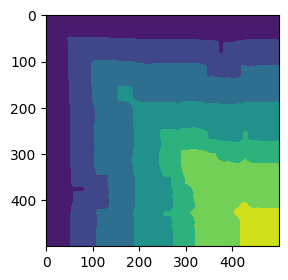

In [22]:
plt.figure(figsize=(3,3))
plt.contourf(cov)
# flip the y axis
plt.gca().invert_yaxis()


# Plotting the covariance kernels for various values of regeneration times

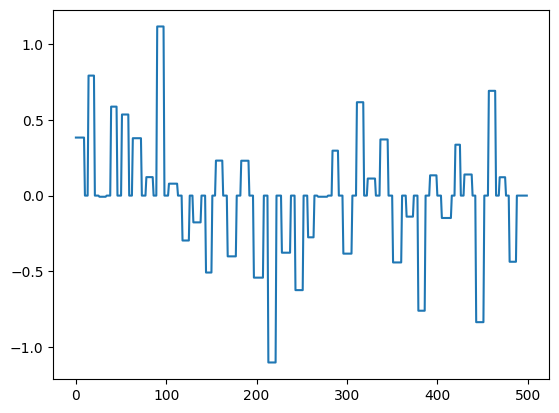

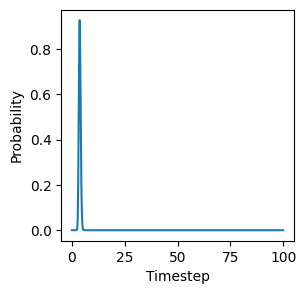

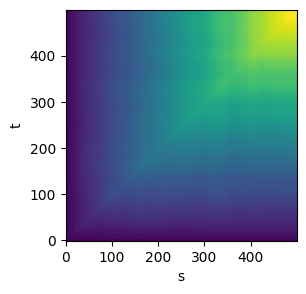

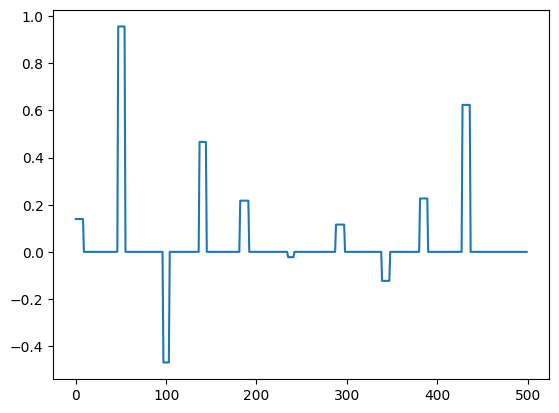

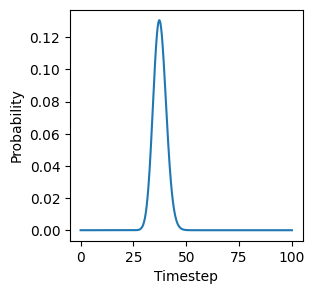

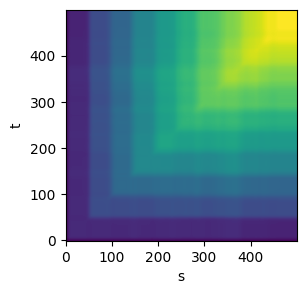

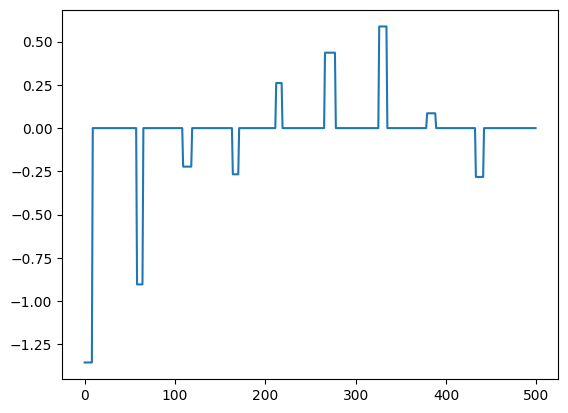

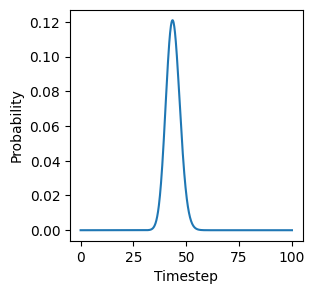

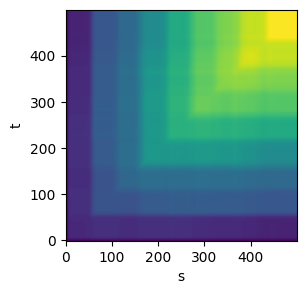

In [36]:
alphax = [75, 150, 175]
scalex = [0.05, 0.25, 0.25]
lbl = ['75_05', '150_25', '175_25']
for q in range(3):
    res_set = []
    for i in range(200):
        res = np.zeros((500,))
        i = 0
        active_period = 0
        idle_period = 0
        for iter in range(100):
            if i + active_period + idle_period < res.shape[0]:
                active_period = int(np.round(gamma.rvs(a = 30, scale = 0.25, size=1)).item() + 1)
                idle_period = int(np.round(gamma.rvs(a=alphax[q], scale=scalex[q], size=1)).item() +1)
                res[i:i+active_period] = norm.rvs(loc=0, scale=0.5, size=1).item()
                # res[i+active_period:i+active_period+idle_period] = norm.rvs(loc=0, scale=0.05, size=1).item()
                i = i+active_period+idle_period
        res_set.append(res)

    plt.figure()
    plt.plot(np.arange(res_set[0].shape[0]), res_set[0])

    res_set = np.array(res_set)
    traj_set = np.cumsum(res_set, axis=1)

    # Compute the covariance kernel of traj_set
    cov = np.zeros((traj_set.shape[1], traj_set.shape[1]))
    for i in range(traj_set.shape[1]):
        for j in range(traj_set.shape[1]):
            cov[i,j] = np.sum(traj_set[:,i]*traj_set[:,j])/traj_set.shape[0]

    plt.figure(figsize=(3,3))
    # plot the pdf of the gamma distribution whose alpha = 30, beta = 0.25
    x = np.linspace(0, 100, 1000)
    plt.plot(x, gamma.pdf(x, a=alphax[q], scale=scalex[q]))
    plt.xlabel('Timestep')
    plt.ylabel('Probability')

    plt.figure(figsize=(3,3))
    plt.imshow(cov)
    # flip the y axis
    plt.gca().invert_yaxis()

    plt.xlabel('s')
    plt.ylabel('t')

    plt.savefig('covariance_kernel_{}.pdf'.format(lbl[q]), bbox_inches='tight')
    



In [29]:
j

499